# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 32.555, 即時現金賣出: 33.225


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [6]:
import requests
from bs4 import BeautifulSoup

# 目標網址（台灣銀行牌告匯率）
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"

# 取得網頁內容
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.encoding = "utf-8"

# 解析 HTML
html = BeautifulSoup(resp.text, "lxml")

# 找到匯率表
rate_table = html.find("table", attrs={"title": "牌告匯率"}).find("tbody").find_all("tr")

# 取得所有貨幣的匯率
for row in rate_table:
    # 取得貨幣名稱
    currency = row.find("div", attrs={"class": "visible-phone print_hide"})

    if currency:
        currency_name = currency.get_text().strip()

        # 取得買入匯率 & 賣出匯率
        buy_rate = row.find("td", attrs={"data-table": "本行現金買入"})
        sell_rate = row.find("td", attrs={"data-table": "本行現金賣出"})

        # 確保數值存在
        buy_rate_text = buy_rate.get_text().strip() if buy_rate else "無資料"
        sell_rate_text = sell_rate.get_text().strip() if sell_rate else "無資料"

        # 印出結果
        print(f"貨幣：{currency_name}")
        print(f"買入匯率：{buy_rate_text}")
        print(f"賣出匯率：{sell_rate_text}")
        print("-" * 40)


貨幣：美金 (USD)
買入匯率：32.555
賣出匯率：33.225
----------------------------------------
貨幣：港幣 (HKD)
買入匯率：4.084
賣出匯率：4.288
----------------------------------------
貨幣：英鎊 (GBP)
買入匯率：41.43
賣出匯率：43.55
----------------------------------------
貨幣：澳幣 (AUD)
買入匯率：20.46
賣出匯率：21.24
----------------------------------------
貨幣：加拿大幣 (CAD)
買入匯率：22.46
賣出匯率：23.37
----------------------------------------
貨幣：新加坡幣 (SGD)
買入匯率：24.13
賣出匯率：25.04
----------------------------------------
貨幣：瑞士法郎 (CHF)
買入匯率：36.47
賣出匯率：37.67
----------------------------------------
貨幣：日圓 (JPY)
買入匯率：0.2125
賣出匯率：0.2253
----------------------------------------
貨幣：南非幣 (ZAR)
買入匯率：-
賣出匯率：-
----------------------------------------
貨幣：瑞典幣 (SEK)
買入匯率：-
賣出匯率：-
----------------------------------------
貨幣：紐元 (NZD)
買入匯率：18.49
賣出匯率：19.34
----------------------------------------
貨幣：泰幣 (THB)
買入匯率：0.851
賣出匯率：1.041
----------------------------------------
貨幣：菲國比索 (PHP)
買入匯率：0.5092
賣出匯率：0.6412
----------------------------------------
貨幣：印尼幣 (IDR)
買入匯率：0.00168

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

貨幣種類：美金 (USD)


<Figure size 1000x600 with 0 Axes>

C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21295 (\N{CJK UNIFIED IDEOGRAPH-532F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 275

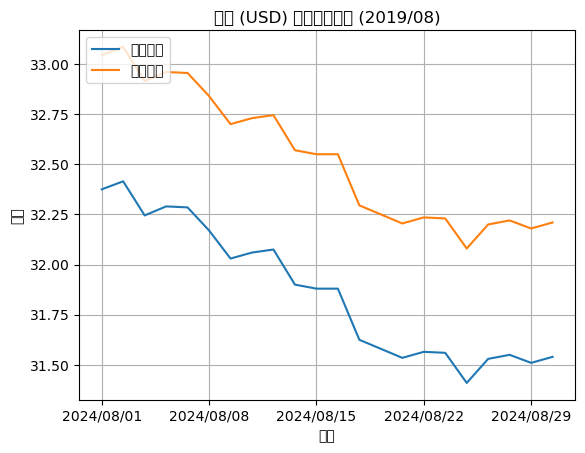

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 目標網址（台灣銀行牌告匯率）
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"

# 取得網頁內容
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.encoding = "utf-8"

# 解析 HTML
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find("table", attrs={"title": "牌告匯率"}).find("tbody").find_all("tr")

# 取得「美金」的歷史匯率網址
currency = rate_table[0].find("div", attrs={"class": "visible-phone print_hide"})
if currency:
    print(f"貨幣種類：{currency.get_text().strip()}")
else:
    print("❌ 無法找到貨幣名稱")
    exit()

history_link = rate_table[0].find("td", attrs={"data-table": "歷史匯率"})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"] if history_link and history_link.a else None

if not history_rate_link:
    print("❌ 無法找到歷史匯率頁面")
    exit()

# 設定查詢 2019 年 8 月的匯率歷史
quote_history_url = history_rate_link.replace("history", "quote/2024-08")

# 取得歷史匯率頁面
resp = requests.get(quote_history_url, headers=headers)
resp.encoding = "utf-8"
history = BeautifulSoup(resp.text, "lxml")

# 解析歷史匯率表格
history_table = history.find("table", attrs={"title": "歷史本行營業時間牌告匯率"}).find("tbody").find_all("tr")

# 儲存數據
date_history = []
history_buy = []
history_sell = []

for history_rate in history_table:
    # 確保日期存在
    date_tag = history_rate.find("a")
    if date_tag:
        date_string = date_tag.get_text().strip()
        try:
            date = datetime.strptime(date_string, "%Y/%m/%d").strftime("%Y/%m/%d")
            date_history.append(date)
        except ValueError:
            print(f"❌ 日期格式錯誤：{date_string}")
            continue
    else:
        print("❌ 無法找到日期")
        continue

    # 擷取買入 & 賣出匯率
    history_ex_rate = history_rate.find_all("td", attrs={"class": "rate-content-cash text-right print_table-cell"})
    
    if len(history_ex_rate) >= 2:
        try:
            history_buy.append(float(history_ex_rate[0].get_text().strip()))
            history_sell.append(float(history_ex_rate[1].get_text().strip()))
        except ValueError:
            print("❌ 匯率數值錯誤")
            continue
    else:
        print("❌ 無法找到完整的匯率數據")
        continue

# 建立 DataFrame
HistoryExchangeRate = pd.DataFrame({
    "date": date_history,
    "buy_rate": history_buy,
    "sell_rate": history_sell
})

# 設定日期為索引，並排序
HistoryExchangeRate.set_index("date", inplace=True)
HistoryExchangeRate.sort_index(ascending=True, inplace=True)

# 繪製歷史匯率趨勢圖
plt.figure(figsize=(10, 6))
HistoryExchangeRate[["buy_rate", "sell_rate"]].plot()
plt.title("美金 (USD) 歷史匯率趨勢 (2019/08)")
plt.xlabel("日期")
plt.ylabel("匯率")
plt.legend(["買入匯率", "賣出匯率"], loc="upper left")
plt.grid()
plt.show()


### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

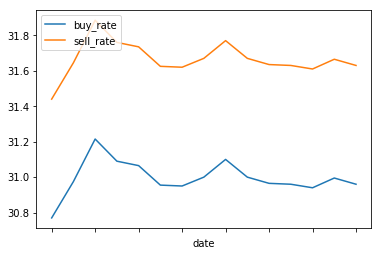


港幣(HKD)



<Figure size 720x576 with 0 Axes>

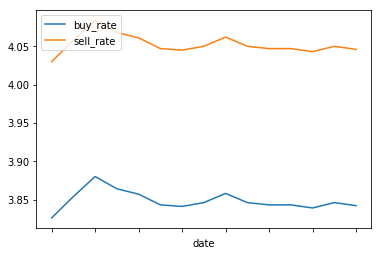


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

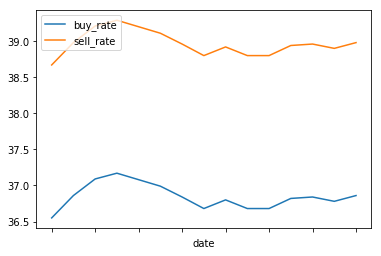


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

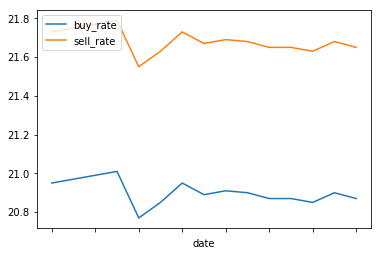


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

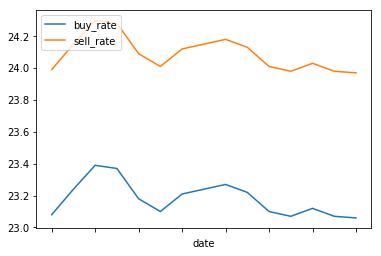


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

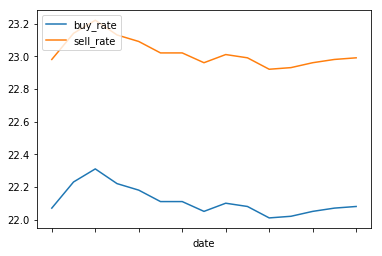


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

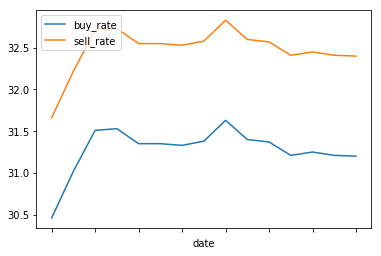


日圓(JPY)



<Figure size 720x576 with 0 Axes>

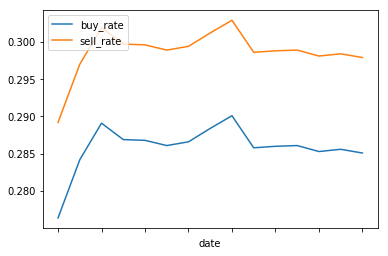


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

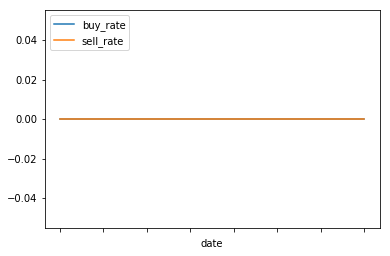


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

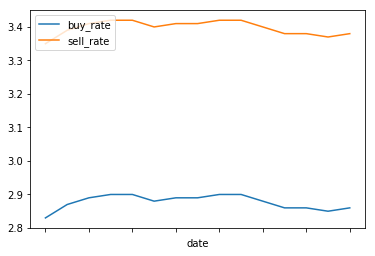


紐元(NZD)



<Figure size 720x576 with 0 Axes>

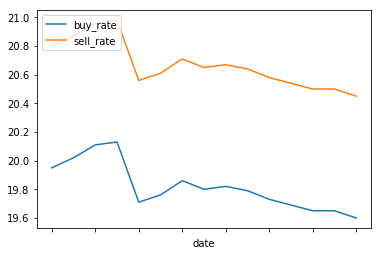


泰幣(THB)



<Figure size 720x576 with 0 Axes>

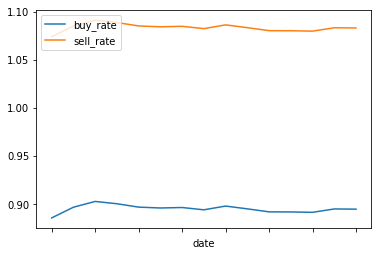


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

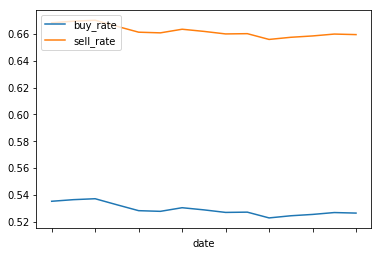


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

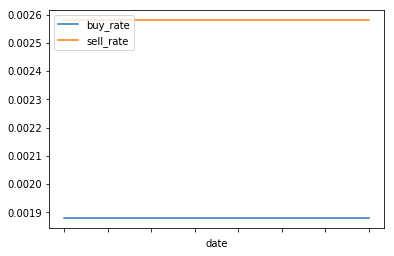


歐元(EUR)



<Figure size 720x576 with 0 Axes>

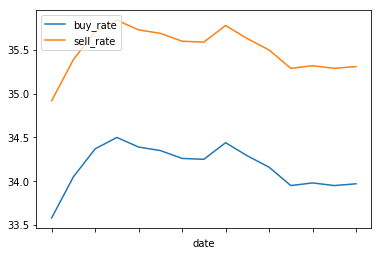


韓元(KRW)



<Figure size 720x576 with 0 Axes>

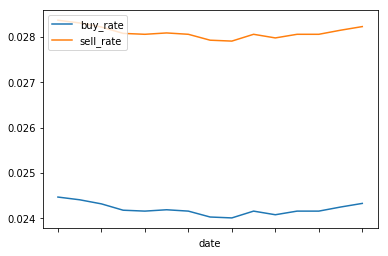


越南盾(VND)



<Figure size 720x576 with 0 Axes>

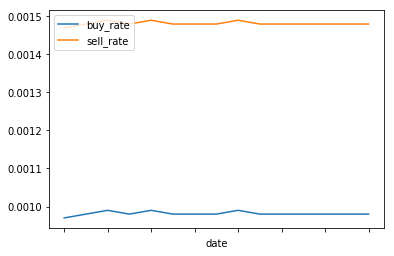


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

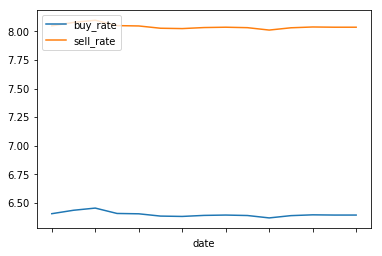


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

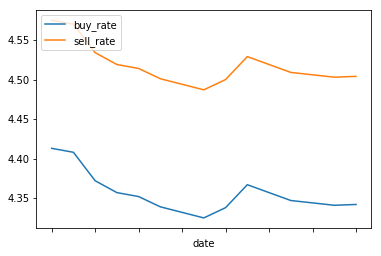

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 目標網址（台灣銀行牌告匯率）
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"

# 取得網頁內容
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.encoding = "utf-8"

# 解析 HTML
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find("table", attrs={"title": "牌告匯率"}).find("tbody").find_all("tr")

# 取得「美金」的歷史匯率網址
currency = rate_table[0].find("div", attrs={"class": "visible-phone print_hide"})
if currency:
    print(f"貨幣種類：{currency.get_text().strip()}")
else:
    print("❌ 無法找到貨幣名稱")
    exit()

history_link = rate_table[0].find("td", attrs={"data-table": "歷史匯率"})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"] if history_link and history_link.a else None

if not history_rate_link:
    print("❌ 無法找到歷史匯率頁面")
    exit()

# 設定查詢 2019 年 8 月的匯率歷史
quote_history_url = history_rate_link.replace("history", "quote/2024-08")

# 取得歷史匯率頁面
resp = requests.get(quote_history_url, headers=headers)
resp.encoding = "utf-8"
history = BeautifulSoup(resp.text, "lxml")

# 解析歷史匯率表格
history_table = history.find("table", attrs={"title": "歷史本行營業時間牌告匯率"}).find("tbody").find_all("tr")

# 儲存數據
date_history = []
history_buy = []
history_sell = []

for history_rate in history_table:
    # 確保日期存在
    date_tag = history_rate.find("a")
    if date_tag:
        date_string = date_tag.get_text().strip()
        try:
            date = datetime.strptime(date_string, "%Y/%m/%d").strftime("%Y/%m/%d")
            date_history.append(date)
        except ValueError:
            print(f"❌ 日期格式錯誤：{date_string}")
            continue
    else:
        print("❌ 無法找到日期")
        continue

    # 擷取買入 & 賣出匯率
    history_ex_rate = history_rate.find_all("td", attrs={"class": "rate-content-cash text-right print_table-cell"})
    
    if len(history_ex_rate) >= 2:
        try:
            history_buy.append(float(history_ex_rate[0].get_text().strip()))
            history_sell.append(float(history_ex_rate[1].get_text().strip()))
        except ValueError:
            print("❌ 匯率數值錯誤")
            continue
    else:
        print("❌ 無法找到完整的匯率數據")
        continue

# 建立 DataFrame
HistoryExchangeRate = pd.DataFrame({
    "date": date_history,
    "buy_rate": history_buy,
    "sell_rate": history_sell
})

# 設定日期為索引，並排序
HistoryExchangeRate.set_index("date", inplace=True)
HistoryExchangeRate.sort_index(ascending=True, inplace=True)

# 繪製歷史匯率趨勢圖
plt.figure(figsize=(10, 6))
HistoryExchangeRate[["buy_rate", "sell_rate"]].plot()
plt.title("美金 (USD) 歷史匯率趨勢 (2019/08)")
plt.xlabel("日期")
plt.ylabel("匯率")
plt.legend(["買入匯率", "賣出匯率"], loc="upper left")
plt.grid()
plt.show()


🔍 正在查詢 美金 (USD) (2025-01) 的歷史匯率...
🔍 正在查詢 港幣 (HKD) (2025-01) 的歷史匯率...
🔍 正在查詢 英鎊 (GBP) (2025-01) 的歷史匯率...
🔍 正在查詢 澳幣 (AUD) (2025-01) 的歷史匯率...
🔍 正在查詢 加拿大幣 (CAD) (2025-01) 的歷史匯率...
🔍 正在查詢 新加坡幣 (SGD) (2025-01) 的歷史匯率...
🔍 正在查詢 瑞士法郎 (CHF) (2025-01) 的歷史匯率...
🔍 正在查詢 日圓 (JPY) (2025-01) 的歷史匯率...
🔍 正在查詢 南非幣 (ZAR) (2025-01) 的歷史匯率...
🔍 正在查詢 瑞典幣 (SEK) (2025-01) 的歷史匯率...
🔍 正在查詢 紐元 (NZD) (2025-01) 的歷史匯率...
🔍 正在查詢 泰幣 (THB) (2025-01) 的歷史匯率...
🔍 正在查詢 菲國比索 (PHP) (2025-01) 的歷史匯率...
🔍 正在查詢 印尼幣 (IDR) (2025-01) 的歷史匯率...
🔍 正在查詢 歐元 (EUR) (2025-01) 的歷史匯率...
🔍 正在查詢 韓元 (KRW) (2025-01) 的歷史匯率...
🔍 正在查詢 越南盾 (VND) (2025-01) 的歷史匯率...
🔍 正在查詢 馬來幣 (MYR) (2025-01) 的歷史匯率...
🔍 正在查詢 人民幣 (CNY) (2025-01) 的歷史匯率...

✅ 所有貨幣的歷史匯率爬取完成！


C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28207 (\N{CJK UNIFIED IDEOGRAPH-6E2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37770 (\N{CJK UNIFIED IDEOGRAPH-938A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28595 (\N{CJK UNIFIED IDEOGRAPH-6FB3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 211

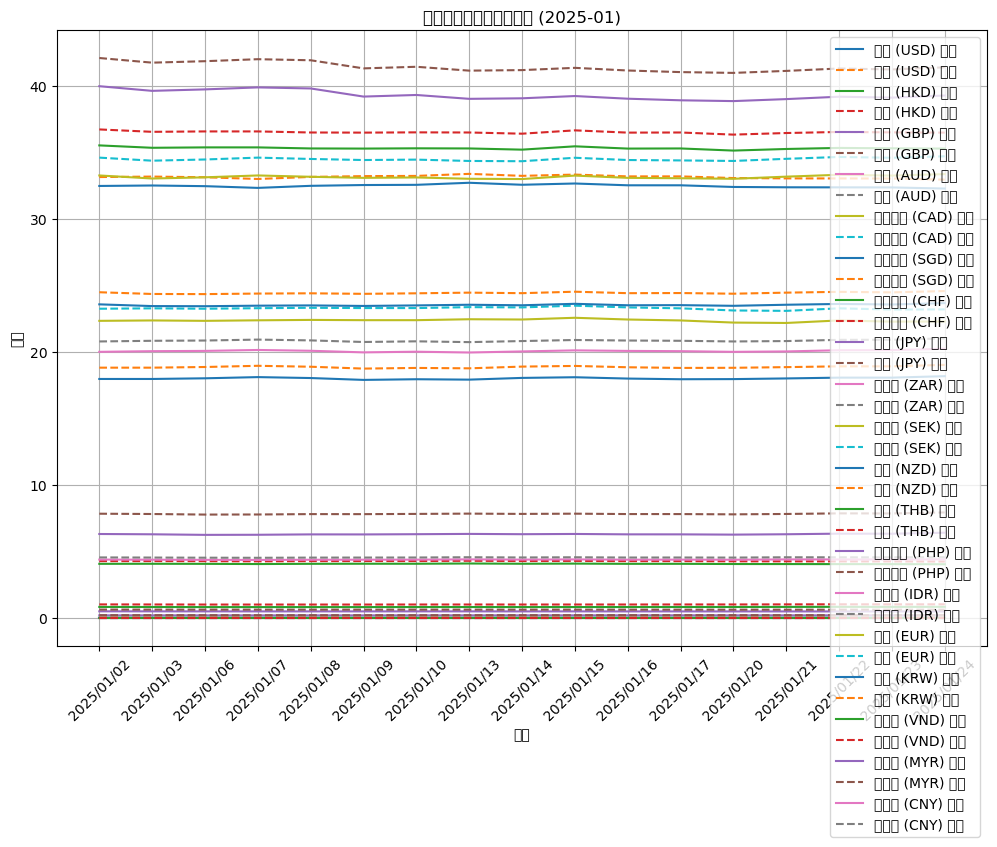

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

# 目標網址（台灣銀行牌告匯率）
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"

# 取得網頁內容
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.encoding = "utf-8"

# 解析 HTML
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find("table", attrs={"title": "牌告匯率"}).find("tbody").find_all("tr")

# 儲存所有貨幣的歷史匯率連結
currency_history_links = {}

for row in rate_table:
    currency = row.find("div", class_="visible-phone print_hide")  # 貨幣名稱
    history_link = row.find("td", attrs={"data-table": "歷史匯率"})  # 歷史匯率網址

    if currency and history_link and history_link.a:
        currency_name = currency.get_text().strip()
        history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]
        currency_history_links[currency_name] = history_rate_link

# 設定查詢的歷史月份（例如 2023 年 1 月）
query_date = "2025-01"

# 儲存所有貨幣的歷史匯率
all_currency_data = {}

for currency_name, history_link in currency_history_links.items():
    # 取得該貨幣的特定月份匯率
    quote_history_url = history_link.replace("history", f"quote/{query_date}")
    
    print(f"🔍 正在查詢 {currency_name} ({query_date}) 的歷史匯率...")
    time.sleep(1)  # 避免請求過快被封鎖

    resp = requests.get(quote_history_url, headers=headers)
    resp.encoding = "utf-8"
    history = BeautifulSoup(resp.text, "lxml")

    # 檢查是否有「查無資料」訊息
    no_data_message = history.find("td", class_="text-center", colspan="6")
    if no_data_message and "找不到任何一筆資料" in no_data_message.get_text():
        print(f"❌ {currency_name} ({query_date}) 沒有歷史數據！")
        continue

    # 解析歷史匯率表格
    history_table = history.find("table", attrs={"title": "歷史本行營業時間牌告匯率"}).find("tbody").find_all("tr")

    date_history = []
    history_buy = []
    history_sell = []

    for history_rate in history_table:
        # 擷取日期
        date_tag = history_rate.find("a")
        if date_tag:
            date_string = date_tag.get_text().strip()
            try:
                date = datetime.strptime(date_string, "%Y/%m/%d").strftime("%Y/%m/%d")
                date_history.append(date)
            except ValueError:
                continue
        else:
            continue

        # 擷取買入 & 賣出匯率
        history_ex_rate = history_rate.find_all("td", attrs={"class": "rate-content-cash text-right print_table-cell"})
        if len(history_ex_rate) >= 2:
            try:
                history_buy.append(float(history_ex_rate[0].get_text().strip()))
                history_sell.append(float(history_ex_rate[1].get_text().strip()))
            except ValueError:
                continue
        else:
            continue

    # 建立 DataFrame
    if date_history:
        df = pd.DataFrame({
            "date": date_history,
            "buy_rate": history_buy,
            "sell_rate": history_sell
        })
        df.set_index("date", inplace=True)
        df.sort_index(ascending=True, inplace=True)

        all_currency_data[currency_name] = df

print("\n✅ 所有貨幣的歷史匯率爬取完成！")

# 畫出所有貨幣的歷史匯率趨勢圖
plt.figure(figsize=(12, 8))

for currency_name, df in all_currency_data.items():
    plt.plot(df.index, df["buy_rate"], label=f"{currency_name} 買入")
    plt.plot(df.index, df["sell_rate"], linestyle="dashed", label=f"{currency_name} 賣出")

plt.title(f"所有貨幣的歷史匯率趨勢 ({query_date})")
plt.xlabel("日期")
plt.ylabel("匯率")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()
